In [1]:
# add dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# pull in dataframe
clean = pd.read_csv("cleaned_data.csv")

,Unnamed: 0,Country,Water Body ID,Year,Unit of Measure,Value,Population Density,GDP
0,13,France,FRGR0005B,2009,[pH],7.68919,122.299437,2.806036e+12
1,16,France,FRGR1496,2009,mg{O2}/L,1.06250,122.299437,2.806036e+12
2,18,France,FRGR0004A,2009,[pH],7.63017,122.299437,2.806036e+12
3,29,France,FRDR173A,2009,mg{O2}/L,1.10833,122.299437,2.806036e+12
4,31,France,FRGR0173,2009,mg{O2}/L,1.76667,122.299437,2.806036e+12


In [3]:
# determine how many countries are in data
clean["Country"].unique()

array(['France', 'Spain', 'Lithuania', 'United Kingdom', 'Germany',
       'Bulgaria', 'Denmark', 'Italy', 'Finland', 'Ireland', 'Belgium',
       'Sweden', 'Portugal', 'Czech Republic', 'Serbia', 'Romania',
       'Switzerland', 'Latvia', 'Austria', 'Luxembourg', 'Norway',
       'Croatia', 'Belarus'], dtype=object)

In [13]:
# population density numbers
x_axis = clean["Country"]
y_axis = clean["Population Density"]

plt.bar(x_axis, y_axis, color="pink", align="center")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Population Density (in ppl per sq km)")
plt.title("Population Density by Country")
plt.show()

In [14]:
# get mean dissolved oxygen per population density
oxy_data = clean.loc[clean["Unit of Measure"] == "mg{O2}/L", :]
oxy_country = oxy_data.set_index("Country").groupby(["Country"])
oxy_country_mean = oxy_country["Value"].mean()
oxy_popden = oxy_country["Population Density"].mean()
oxy_summary = pd.DataFrame({"Population Density": oxy_popden, "Avg Oxygen Levels (in mg{O2}/L)": oxy_country_mean,})
oxy_summary

In [15]:
# plot dissolved oxygen vs population density
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(oxy_summary["Population Density"],oxy_summary["Avg Oxygen Levels (in mg{O2}/L)"])
regress_oxyvalues = oxy_summary["Population Density"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#calculate rvalue
print(f"The correlation between population density and the average dissolved oxygen is {rvalue}")

#make scatterplot
x_axis = oxy_summary["Population Density"]
y_axis = oxy_summary["Avg Oxygen Levels (in mg{O2}/L)"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='cyan', edgecolors='purple', alpha=0.75)
plt.title('Population Density vs. Avg Oxygen Levels (in mg{O2}/L)')
plt.xlabel('Population Density')
plt.ylabel('Avg Oxygen Levels (in mg{O2}/L)')
plt.plot(oxy_summary["Population Density"], regress_oxyvalues, color="black")
plt.axhline(y=6, color="gray", linestyle="-", alpha=0.5)
plt.show()

In [16]:
# get mean temp per population density
temp_data = clean.loc[clean["Unit of Measure"] == "Cel", :]
temp_country = temp_data.set_index("Country").groupby(["Country"])
temp_country_mean = temp_country["Value"].mean()
temp_popden = temp_country["Population Density"].mean()
temp_country_mean
temp_summary = pd.DataFrame({"Population Density": temp_popden, "Avg Water Temp (in deg Celsius)": temp_country_mean,})
temp_summary

In [17]:
# plot mean water temp vs population density
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(temp_summary["Population Density"],temp_summary["Avg Water Temp (in deg Celsius)"])
regress_tempvalues = temp_summary["Population Density"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#calculate rvalue
print(f"The correlation between population density and the average water temperature is {rvalue}")

#make scatterplot
x_axis = temp_summary["Population Density"]
y_axis = temp_summary["Avg Water Temp (in deg Celsius)"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='orange', edgecolors='red', alpha=0.75)
plt.title('Population Density vs. Avg Water Temp (C)')
plt.xlabel('Population Density')
plt.ylabel('Avg Water Temp (in deg Celsius)')
plt.plot(temp_summary["Population Density"], regress_tempvalues, color="black")
plt.show()


In [18]:
# ph mean numbers
ph_data = clean.loc[clean["Unit of Measure"] == "[pH]", :]
ph_country = ph_data.set_index("Country").groupby(["Country"])
ph_country_mean = ph_country["Value"].mean()
ph_popden = ph_country["Population Density"].mean()
ph_country_mean
ph_summary = pd.DataFrame({"Population Density": ph_popden, "Avg Water pH": ph_country_mean,})
ph_summary

In [19]:
# create ph scatterplot vs population density
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(ph_summary["Population Density"],ph_summary["Avg Water pH"])
regress_values = ph_summary["Population Density"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#calculate rvalue
print(f"The correlation between population density and the average water pH is {rvalue}")

#make pH scatterplot
x_axis = ph_summary["Population Density"]
y_axis = ph_summary["Avg Water pH"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='yellow', edgecolors='green', alpha=0.75)
plt.title('Population Density vs. Mean Water pH')
plt.xlabel('Population Density')
plt.ylabel('Mean Water pH')
plt.plot(ph_summary["Population Density"], regress_values, color="black")
plt.axhline(y=6.5, color="gray", linestyle="-", alpha=0.5)
plt.axhline(y=9, color="gray", linestyle="-", alpha=0.5)
plt.show()

In [26]:
# gdp
#GDP_format = france_water
#GDP_format = clean 
#GDP_format["GDP"] = GDP_format["GDP"].map("${:,.2f}".format)
#GDP_format


In [27]:
#  gdp
#year_format = france_water
#year_format = clean
#year_format["Year"] = year_format["Year"].map("{:.0f}".format)
#year_format


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'France'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Lithuania'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Bulgaria'),
  Text(6, 0, 'Denmark'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Finland'),
  Text(9, 0, 'Ireland'),
  Text(10, 0, 'Belgium'),
  Text(11, 0, 'Sweden'),
  Text(12, 0, 'Portugal'),
  Text(13, 0, 'Czech Republic'),
  Text(14, 0, 'Serbia'),
  Text(15, 0, 'Romania'),
  Text(16, 0, 'Switzerland'),
  Text(17, 0, 'Latvia'),
  Text(18, 0, 'Austria'),
  Text(19, 0, 'Luxembourg'),
  Text(20, 0, 'Norway'),
  Text(21, 0, 'Croatia'),
  Text(22, 0, 'Belarus')])

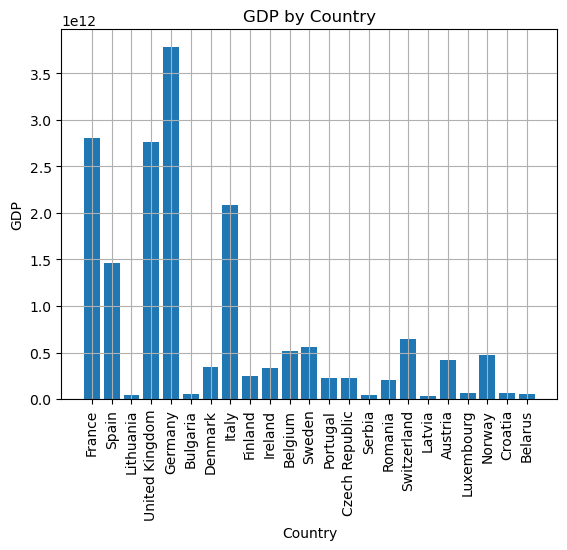

In [37]:
# gdp
import matplotlib.pyplot as plt
import numpy as np

plt.bar(clean["Country"], clean["GDP"]) #.map("${:,.2f}".format))

# Incorporate the other graph properties
plt.ylabel("GDP")
plt.xlabel("Country")
#plt.title("GDP by Year in France")
plt.title("GDP by Country")
plt.xticks(rotation=90)
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
#plt.show()

In [ ]:
#Create DF of Stats for Temp- all years combined for each country
Temp = clean['Unit of Measure'] == 'Cel'

Country_Temp_Stats = clean[Temp].groupby(['Country', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
Country_Temp_Stats.columns = ['Country', 'GDP', 'Population Density', 'Mean Temp', 'Median Temp', 
                      'Temp Variance', 'Temp Std. Dev.', 'Temp Std. Err.']
Country_Temp_Stats.head()

In [ ]:
#Create DF of Stats for Dissolved O2 - all years combined for each country
O2 = clean['Unit of Measure'] == 'mg{O2}/L'

Country_O2_Stats = clean[O2].groupby(['Country', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
Country_O2_Stats.columns = ['Country', 'GDP', 'Population Density', 'Mean O2', 'Median O2', 
                    'O2 Variance', 'O2 Std. Dev.', 'O2 Std. Err.']
Country_O2_Stats.head()

In [ ]:
#Create DF of Stats for pH - all years combined for each country
pH = clean['Unit of Measure'] == '[pH]'

Country_pH_Stats = clean[pH].groupby(['Country', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
Country_pH_Stats.columns = ['Country', 'GDP', 'Population Density', 'Mean pH', 'Median pH', 
                    'pH Variance', 'pH Std. Dev.', 'pH Std. Err.']
Country_pH_Stats.head()

In [ ]:
def LinReg(x_data, y_data, annotate_position):
    slope, intercept, r, p, std_err=st.linregress(x_data, y_data)
    fit=slope*x_axis+intercept
    plt.plot(x_data, fit, '--', color='red', )
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(annotate_position),fontsize=15,color="red")
    print(f'The r-value is:{r}')

In [ ]:
# Build scatter plot with regression line for GDP vs Mean Temp
x_axis=Country_Temp_Stats['GDP']
y_axis=Country_Temp_Stats['Mean Temp']
plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black', alpha=0.75)
Poss=2.5e12, 7
LinReg(x_axis, y_axis, Poss)
plt.title('GDP vs. Mean Water Tempurature')
plt.xlabel('GDP')
plt.ylabel('Mean Water Tempurature (C)')
# Save the figure
# plt.savefig("output_data/GDP_MeanTemp_ScatterRegression.png")
plt.show()

In [ ]:
# Build scatter plot with regression line for GDP vs Mean pH
x_axis=Country_pH_Stats['GDP']
y_axis=Country_pH_Stats['Mean pH']
plt.axhline(y=6.5, color='gray', linestyle='-', alpha=0.5)
plt.axhline(y=9, color='gray', linestyle='-', alpha=0.5)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
Poss=2.5e12, 7
LinReg(x_axis, y_axis, Poss)
plt.title('GDP vs. Mean pH')
plt.xlabel('GDP')
plt.ylabel('Mean pH')
# Save the figure
# plt.savefig("output_data/GDP_MeanpH_ScatterRegression.png")
plt.show()

In [ ]:
# Build scatter plot with regression line for GDP vs Dissolved 0xygen
x_axis=Country_O2_Stats['GDP']
y_axis=Country_O2_Stats['Mean O2']
plt.axhline(y=6, color='gray', linestyle='-', alpha=0.5)
plt.axhline(y=2, color='gray', linestyle='-', alpha=0.5)
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
Poss=2.5e12, 7
LinReg(x_axis, y_axis, Poss)
plt.title('GDP vs. Mean Dissolved Oxygen')
plt.xlabel('GDP')
plt.ylabel('Mean Dissolved Oxygen (mg/L)')
# Save the figure
# plt.savefig("output_data/GDP_MeanO2_ScatterRegression.png")
plt.show()